In [52]:
#import libary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Data pre proccessing

In [53]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [54]:
print("Train data frame")
train.head()


Train data frame


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
print("Test data frame")
test.head()

Test data frame


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


categorical value: passengerId , survived , p class, name , sex , SibSp , Parch , embarked
numerical value : age, fare
mix : ticket,cabin
blank or null : age cabin embarked
various data type int64 float 64 object

Change type categorical value to catergorical

In [57]:
categorical = ["PassengerId","Survived","Pclass","Name","Sex","SibSp","Parch","Embarked"]
for item in categorical:
    train[f'{item}'] = train[f'{item}'].astype("category")

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    category
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(8), float64(2), object(2)
memory usage: 116.4+ KB


In [59]:
train.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


CATERGORY DISTRIBUTION

In [60]:
train.describe(include = ["category"])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,891,891,889
unique,891,2,3,891,2,7,7,3
top,1,0,3,"Abbing, Mr. Anthony",male,0,0,S
freq,1,549,491,1,577,608,678,644


<h1>EDA</h1>

>Tìm mối liên hệ giữa các biến và biến mục tiêu là survived 

<AxesSubplot: ylabel='Survived'>

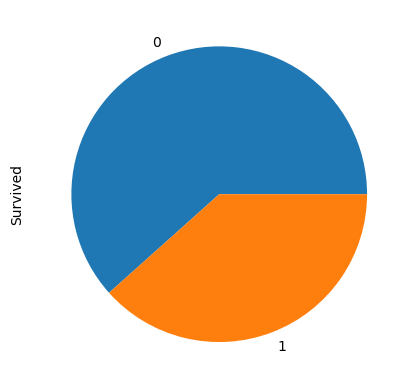

In [61]:
train.Survived.value_counts().plot.pie()

The percentage of women survived 74%
The percentage of man survived 19%


[]

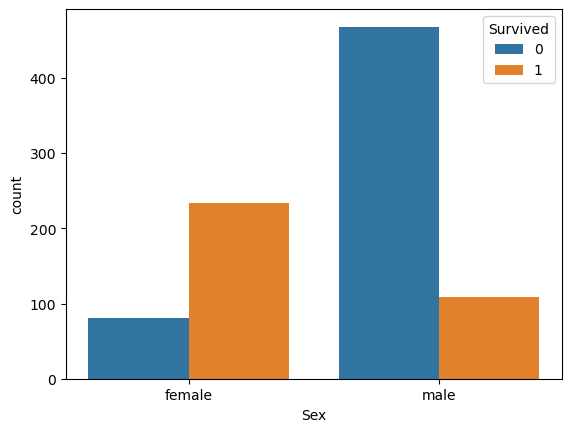

In [79]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = round(sum(women)/len(women) * 100)
print(f"The percentage of women survived {rate_women}%")
man = train.loc[train.Sex == 'male']["Survived"]
rate_man = round(sum(man)/len(man) * 100)
print(f"The percentage of man survived {rate_man}%")
sns.countplot(x = "Sex" ,data=train,hue = "Survived")
plt.plot()

> nhận thấy rằng tỉ lệ sống sót ở nam là thấp hơn so với tỉ lệ sống sót ở nũ là cao hơn so với ở nam ,tỉ lệ sống sot ở nữ là 74% và ở nam là 19%

percentage of people in class 1 is 63 %
percentage of people in class 2 is 47 %
percentage of people in class 3 is 24 %


[]

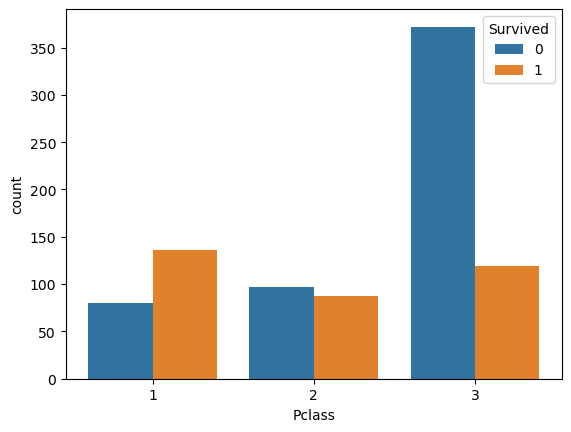

In [98]:
pclass = [1,2,3]
for i in pclass:
    pclass = train.loc[train.Pclass == i]["Survived"]
    pclass_rate = round(sum(pclass) / len(pclass) * 100)
    print(f"percentage of people in class {i} is {pclass_rate} %")
sns.countplot(x = "Pclass" ,data=train,hue = "Survived")
plt.plot()

>Tỉ lệ sống sót ở các khoang hạng cao cấp hơn là cao hơn so với các khoang ở hạng dưới 

percentage of people survived enter ship in Cherbourg is 55 %
percentage of people survived enter ship in Queenstown is 39 %
percentage of people survived enter ship in Southampton is 34 %


[]

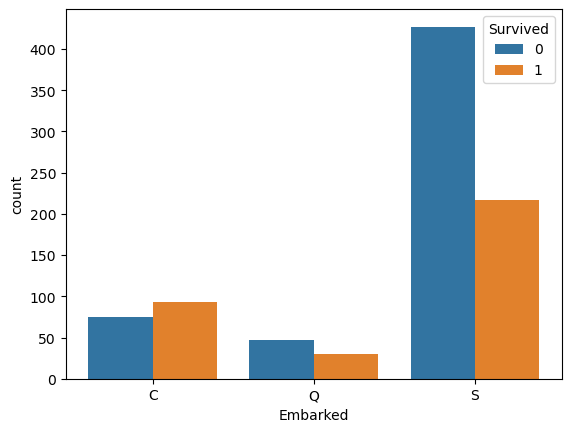

In [99]:
Embarked = ['C','Q','S']
for i in Embarked:
    Embarked = train.loc[train.Embarked == i]["Survived"]
    Embarked_rate = round(sum(Embarked) / len(Embarked) * 100)
    if i == 'C':
        i = "Cherbourg"
    elif i == 'Q':
        i = "Queenstown"
    elif i == 'S':
        i = "Southampton"
    print(f"percentage of people survived enter ship in {i} is {Embarked_rate} %")
sns.countplot(x = "Embarked" ,data=train,hue = "Survived")
plt.plot()

[]

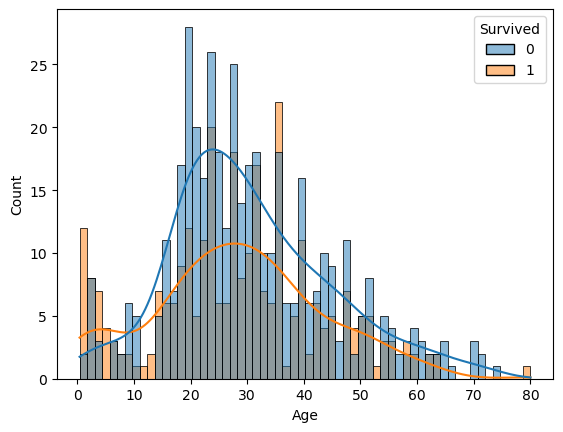

In [174]:
sns.histplot(data = train,x = 'Age',kde = True,bins=60,hue = 'Survived')
plt.plot()

>percentage of survived by age in 4 group

>split age variabel into 4 type lower than 18 , 18 to 30, 30 to 50 , more than 50

percentage of Teenager survived is 50  %
percentage of Adult survived is 35  %
percentage of Middle Age survived is 42  %
percentage of Old survived is 36  %


[]

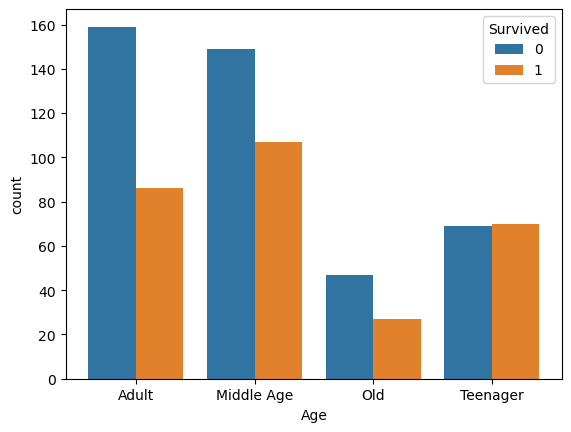

In [155]:
cache = train.copy()
cache.Age.astype("category")
for i in cache.Age:
    if i <= 18:
        cache.Age = cache.Age.replace(i,"Teenager")
    if i < 30 and i > 18:
        cache.Age = cache.Age.replace(i,"Adult")
    if i < 50 and i >= 30:
        cache.Age = cache.Age.replace(i,"Middle Age")
    if i >= 50:
        cache.Age = cache.Age.replace(i,"Old")
category_age = ["Teenager","Adult","Middle Age","Old"]
for i in category_age:
    category_age = train.loc[cache.Age == i]["Survived"]
    category_rate = round(sum(category_age) / len(category_age) * 100)
    print(f"percentage of {i} survived is {category_rate}  %")
sns.countplot(x = "Age" ,data=cache,hue = "Survived")
plt.plot()


> người trong độ tuổi ít hơn hoặc 18 tuổi có tỉ lệ sống cao nhất với 50 % sau đó là người trong độ tuổi từ 30 đến 50 với 42% tiêps đến là người trong độ tuổi trên 50 với 36% và người trong khoảng 18 đến 30 là 35%

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


[]

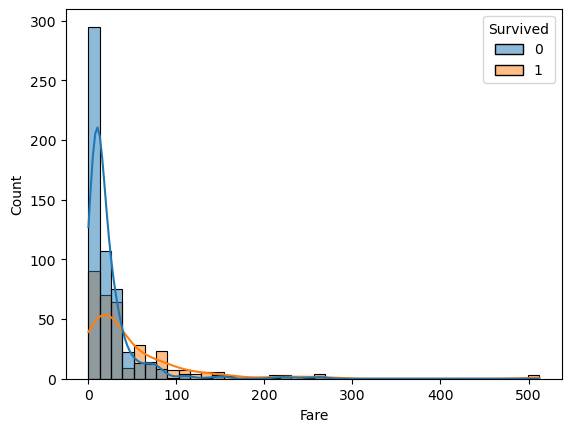

In [171]:
print(train.Fare.describe())
sns.histplot(data = train,x = 'Fare',kde = True,bins=40,hue = 'Survived')
plt.plot()

In [162]:
fare_category = pd.qcut(train['Fare'],4,["Economy Class","Premium Class","Business Class","First Class"])

percentage of people in Economy Class survived is 20  %
             Fare
count  223.000000
mean     7.034172
std      1.946215
min      0.000000
25%      7.229200
50%      7.750000
75%      7.854200
max      7.895800
percentage of people in Premium Class survived is 30  %
             Fare
count  224.000000
mean    10.386050
std      2.188359
min      7.925000
25%      8.050000
50%      9.843750
75%     13.000000
max     14.454200
percentage of people in Business Class survived is 45  %
             Fare
count  222.000000
mean    23.028677
std      5.093019
min     14.458300
25%     18.750000
50%     25.466700
75%     26.550000
max     31.000000
percentage of people in First Class survived is 58  %
             Fare
count  222.000000
mean    88.677872
std     74.163197
min     31.275000
25%     46.900000
50%     69.550000
75%     91.079200
max    512.329200


[]

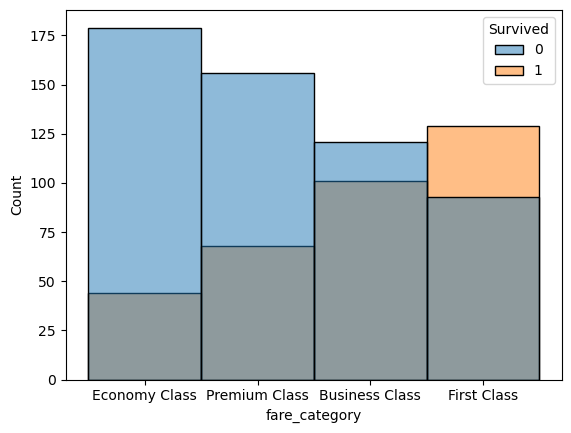

In [176]:
cache['fare_category'] = fare_category
fare = ["Economy Class","Premium Class","Business Class","First Class"]
for i in fare:
    fare = cache.loc[cache.fare_category == i]["Survived"]
    fare_rate = round(sum(fare) / len(fare) * 100)
    print(f"percentage of people in {i} survived is {fare_rate}  %")
sns.histplot(data = cache,x = 'fare_category',hue = 'Survived')
plt.plot()

>nhận thấy rằng tỉ lệ sống sót tăng dần theo hạng giá vé nếu hạng giá vé càng cao tỉ lệ sống sót sẽ cao hơn 